In [ ]:
import fitz

with fitz.open(r"C:\Users\VisheshikaVijayBahet\Desktop\webscraping\lsd_17_01_01-07-2019.pdf") as doc:
    text = ""
    for page in doc:
        text += page.get_text()

print(text)

In [ ]:
import re
text_eng=re.sub(r'[^A-Za-z0-9 ]+', '', text)
print(text_eng)

In [ ]:
import re
text_eng=re.sub(r'[^A-Za-z0-9 ]+', '', text)
print(text_eng)

In [ ]:
lines="Artificial intelligence (AI) has emerged as a transformative force, reshaping the landscape of society in ways that were once thought to be the realm of science fiction. As we stand at the crossroads of human ingenuity and technological advancement, the influence of AI permeates through various facets of our daily lives, from the mundane to the extraordinary. At its core, AI represents the development of computer systems capable of performing tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. The implications of this technological leap are profound, raising both hopes and concerns about the future trajectory of our interconnected global society. One of the most noticeable impacts of AI is evident in the realm of automation. Industries across the spectrum, from manufacturing to service sectors, have embraced AI-powered robotic systems to streamline operations and enhance efficiency. While this has undoubtedly led to increased productivity and cost-effectiveness, it has also sparked debates about the potential displacement of human labor. The fear of job loss looms large in discussions about the integration of AI into the workforce, prompting reflections on the need for education and training programs to equip individuals with the skills necessary to thrive in a world where machines are increasingly capable of handling routine tasks. AI's influence extends beyond the workplace and into our homes, with the advent of smart technologies that utilize machine learning algorithms to anticipate and respond to user preferences. Virtual personal assistants, powered by AI, have become ubiquitous, offering users a seamless interface to control smart homes, schedule appointments, and even engage in casual conversations. The convenience of such applications is undeniable, yet it raises ethical considerations regarding privacy and data security. The vast amount of personal information processed by AI systems poses challenges in terms of safeguarding individual privacy and ensuring responsible use of sensitive data. In the field of healthcare, AI has demonstrated remarkable potential for revolutionizing diagnostics and treatment. Machine learning algorithms can analyze vast datasets, identifying patterns and correlations that human practitioners might overlook. This capability has led to advancements in medical imaging, early disease detection, and personalized treatment plans. However, the integration of AI in healthcare also presents ethical dilemmas, such as the responsible handling of patient data, the potential for biased algorithms, and the need for a balance between technological innovation and the human touch in medical care.Education is another arena where AI is making its mark, offering personalized learning experiences that cater to individual student needs. Adaptive learning platforms use AI algorithms to assess a student's strengths and weaknesses, tailoring the curriculum to optimize learning outcomes. While this approach has the potential to narrow educational gaps and enhance student engagement, it raises questions about the role of teachers in the face of increasingly autonomous AI systems. Striking the right balance between technological assistance and human guidance becomes crucial in shaping the future of education. As AI continues to evolve, so does its impact on creative pursuits. From art to music and literature, AI algorithms are being employed to generate original works or augment the creative process. While some celebrate the fusion of human creativity and machine intelligence, others express concerns about the authenticity and emotional depth of AI-generated art. The question of whether machines can truly replicate the nuances of human expression remains a subject of philosophical inquiry, highlighting the intersection of technology and the intangible aspects of the human experience.Ethical considerations surrounding AI are at the forefront of societal discourse. Questions about accountability, transparency, and bias in AI algorithms have prompted calls for ethical frameworks and regulations to ensure responsible development and deployment. The potential for AI systems to perpetuate or exacerbate existing societal inequalities is a pressing concern, necessitating careful scrutiny of the ethical implications at each stage of AI implementation. The interdisciplinary nature of these challenges requires collaboration between technologists, ethicists, policymakers, and the broader public to navigate the ethical complexities of an AI-driven world. On the geopolitical stage, AI has become a strategic asset, with nations vying for supremacy in technological innovation. The race for dominance in AI research and development has significant implications for economic competitiveness, national security, and global influence. The pursuit of AI capabilities raises geopolitical tensions and sparks debates about the responsible use of AI in military applications, autonomous weaponry, and cyber warfare. As nations grapple with the implications of AI on the global stage, the need for international cooperation and ethical standards becomes imperative to mitigate potential risks and foster a more stable and equitable world order.In conclusion, the impact of artificial intelligence on society is multifaceted, touching upon various aspects of human existence. From the workplace to our homes, from healthcare to education, and from the realms of creativity to geopolitical dynamics, AI has become a pervasive force shaping the trajectory of our collective future. The challenges and opportunities presented by AI demand a thoughtful and collaborative approach, one that balances technological progress with ethical considerations, ensuring that the benefits of AI are harnessed for the greater good of humanity. As we navigate the uncharted waters of an AI-driven era, the choices we make today will shape the contours of the world we inhabit tomorrow."

In [ ]:
%%script false
import pandas as pd
from summarizers import Summarizers
summ = Summarizers('normal')
summary=summ(lines)
print(summary)

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
from operator import itemgetter
 
from wordcloud import WordCloud, STOPWORDS
 
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = r"C:\\Users\\VisheshikaVijayBahet\\Pictures\\"
 
stopwords = set(STOPWORDS)
  
clean_circle_mask = np.array(Image.open(path.join(d, "map.png")))
 
wc_rect = WordCloud(background_color="white", max_words=500, width=3000,
                    height=1500, stopwords=stopwords, min_font_size=2,
                    contour_width=3, contour_color='black')
wc_rect.generate(text_eng)
wc_rect.to_file(path.join(d, "wc-rectangle.png"))
 
wc = WordCloud(background_color="white", max_words=1000, width=2000,
               height=1000, mask=clean_circle_mask, stopwords=stopwords,
               min_font_size=2, contour_width=3, contour_color='black')
 
wc.generate(text_eng)
wc.to_file(path.join(d, "wc-masked.png"))

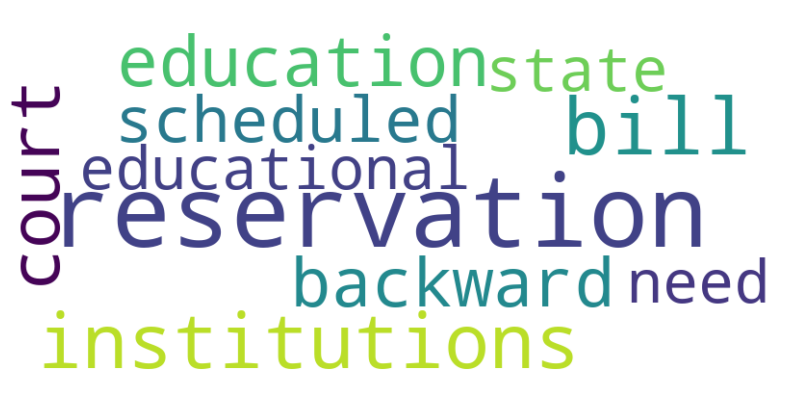

Top 10 words and their counts:
reservation: 133
bill: 73
institutions: 69
court: 59
education: 58
backward: 56
scheduled: 50
state: 46
need: 45
educational: 45


In [253]:
from wordcloud import WordCloud
from nltk import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

banned_words= ['sir', 'hon', 'shri', 'per' ,'cent', 'government', 'india', 'will', 'central','people','one','minister']
stopwords = set(STOPWORDS) 
stopwords_new = stopwords.union(banned_words)

# Preprocess the text (remove punctuation and lowercase)
text_eng = re.sub(r'[^\w\s]', '', text_eng.lower())
text_eng= re.sub(r'[0-9]+', '', text_eng)

# Tokenize the text
tokens = text_eng.split()

# Remove stopwords
filtered_tokens = [word for word in tokens if word not in stopwords_new]

# Get word frequencies
freq_dist = FreqDist(filtered_tokens)

# Get the top 10 words 
top_words = freq_dist.most_common(10)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print the count of the top 10 words
print("Top 10 words and their counts:")
for word, count in top_words:
    print(f"{word}: {count}")

In [ ]:
%%script false
import nltk
nltk.download('punkt')  # Make sure to download the punkt tokenizer data

def generate_iterative_summary(text_eng, token_limit=100, summary_length=50):
    sentences = nltk.sent_tokenize(text_eng)
    
    summary = ""

    for sentence in sentences:
        sentence_tokens = len(sentence.split())

        # Check if adding the current sentence exceeds the token limit
        if sentence_tokens <= token_limit:
            # Add the current sentence to the summary
            summary += sentence + " "
            total_tokens += sentence_tokens
        else:
            # If adding the current sentence exceeds the limit, stop
            break

    # Create a summary with the desired word count
    words = summary.split()[:summary_length]
    final_summary = ' '.join(words)

    return final_summary

result_summary = generate_iterative_summary(text_eng, token_limit, summary_length)
print(result_summary)


